 # <div align="center">DATA ANALYTICS
### <div align="center">ASSIGNMENT - 1
### <div align="center">LINEAR REGRESSION AND LOGISTIC REGRESSION

Submitted to: Asst. Proff. Rahul Thakur <div align="right">Submitted by: Sumedha


### **<div align="center">LOGISTIC REGRESSION USING SKLEARN**
    
    Link for dataset: https://drive.google.com/file/d/1jkkeQjuDAgUwP3as2RIqpiG1t9kWzRIw/view?usp=sharing

In [ ]:
## IMPORTING LIBRARIES

import numpy as np
import pandas as pd
from sklearn import preprocessing

In [ ]:
## READING DATA AND PRE-PROCESSING IT
df = pd.read_csv("/Users/sumedha/Desktop/dataset.csv")
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [ ]:
## DEFINING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
## DIVIDING DATASET INTO TRAINING AND TEST SET
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [ ]:
## FITTING THE LOGISTIC REGRESSION
clf.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
## MAKING PREDICTIONS 
predictions = clf.predict(X_test)

In [ ]:
## CALCULATING THE ACURACY SCORE
from sklearn.metrics import accuracy_score
print('Accuracy score with sklearn: ', format(accuracy_score(Y_test, predictions)))

Accuracy score with sklearn:  0.7125


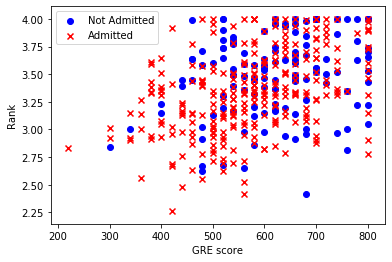

In [ ]:
## PLOTTING THE DATA
from numpy import where
from pylab import scatter, show, legend, xlabel, ylabel
one = np.where(Y == 1)
zero = np.where(Y == 0)
scatter(X[one, 0], X[one, 1], marker='o', c='b')
scatter(X[zero, 0], X[zero, 1], marker='x', c='r')
xlabel('GRE score')
ylabel('Rank')
legend(['Not Admitted', 'Admitted'])
show()

### **<div align="center">LOGISTIC REGRESSION USING PYTHON**

In [ ]:
## DEFINING INITIAL VARIABLES
theta_init = [1,1]
alpha = 0.01
iterations = 10

In [ ]:
## DEFINING SIGMOID FUNCTION
def sigmoid_fun(f):
    sig = 1 / (1 + np.exp(-1*f))
    return sig

In [ ]:
## DEFINING HYPOTHESIS FUNCTION
def hypothesis(theta, x):
    f = 0
    for i in range(len(theta)):
        f = f+(x[i]*theta[i])
    return sigmoid_fun(f)

In [ ]:
## DEFINING COST FUNCTION
def cost_function(X,Y,theta,m):
    error_sum = 0
    for i in range(m):
        xi = X[i]
        hi = hypothesis(theta,xi)
        if Y[i] == 1:
            error = Y[i] * np.log(hi)
        elif Y[i] == 0:
            error = (1-Y[i]) * np.log(1-hi)
        error_sum += error
    const = -1/m
    J = const * error_sum
    return J

In [ ]:
## CALCULATING DERIVATIVE OF COST FUNCTION
def der_j(X,Y,theta,j,m,alpha):
    error_sum_der = 0
    for i in range(m):
        xi = X[i]
        xij = xi[j]
        hi = hypothesis(theta,X[i])
        error = (hi - Y[i])*xij
        error_sum_der = error_sum_der+error
    m = len(Y)
    c = alpha/m
    J = c*error_sum_der
    return J

In [ ]:
## DEFINING GRADIENT DESCENT
def gradient_descent(X,Y,theta,m,alpha):
    theta_new = []
    constant = alpha/m
    for j in range(len(theta)):
        CFDerivative = der_j(X,Y,theta,j,m,alpha)
        new_theta_value = theta[j] - CFDerivative
        theta_new.append(new_theta_value)
    return theta_new

In [ ]:
## DEFINING LOGISTIC REGRESSION
def logistic_regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        theta_new = gradient_descent(X,Y,theta,m,alpha)
        theta = theta_new
        if x % 100 == 0:
            cost_function(X,Y,theta,m)

In [ ]:
score = 0
length = len(X_test)
for i in range(length):
    prediction = round(hypothesis(theta_init, X_test[i]))
    answer = Y_test[i]
    if prediction == answer:
        score += 1
accuracy_score_py = score/length
print('Accuracy score with python: ', format(accuracy_score_py))

Accuracy score with python:  0.3875


In [ ]:
logistic_regression(X,Y,alpha,theta_init,iterations)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


### **COMPARISION OF LOGISTIC REGRESSION USING SKLEARN AND LOGISTIC REGRESSION USING PYTHON:**
1. While implementing Logistic Regression using pyhon we have to initialize some parameters and adjust them in such a way that we obtain optimum accuracy, these parameters are automatically initialized while implementing through sklearn
2. Accuracy using sklearn (0.65) is much more than accuracy using Python(.4)

### **<div align="center">LINEAR REGRESSION USING SKLEARN**
    Link for dataset: https://drive.google.com/file/d/1DsVviPI0M9Iw7dgB71Fw684oTujDxckp/view?usp=sharing

In [ ]:
## READING DATA AND PRE-PROCESSING IT
df2 = pd.read_csv('/Users/sumedha/Desktop/dataset2.csv')
X = df2.iloc[:,2].values
Y = df2.iloc[:,3].values

In [ ]:
## DIVIDING DATASET INTO TRAINING AND TEST SET
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [ ]:
## FITTING THE LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
X_train = X_train.reshape((-1, 1))
reg = LinearRegression()
reg = reg.fit(X_train, Y_train)

In [ ]:
## PREDICTING USING THE LINEAR REGRESSION
X_test = X_test.reshape((-1, 1))
predictions = reg.predict(X_test)

In [ ]:
## CALCULATING THE R2 SCORE
X = X.reshape((-1, 1))
reg.score(X, Y)

0.6391614839782399

### **<div align="center">LINEAR REGRESSION USING PYTHON**

In [ ]:
## CALCULATING COEFFICIENTS c0 and c1

mean_in = np.mean(X)
mean_out = np.mean(Y)
num = 0
dnm = 0
for i in range(len(X)):
    num = num+((X[i] - mean_in) * (Y[i] - mean_out))
    dnm = dnm+((X[i] - mean_in) ** 2)
c1 = num / dnm
c0 = mean_out - (c1 * mean_in)

print("Coefficients are {},{}".format(c1, c0))


Coefficients are [0.26342934],[325.57342105]


In [ ]:
# CALCULATING PREDICTION AND THE R2 SCORE

t = 0
r = 0
for i in range(len(X)):
    prediction = c0 + c1 * X[i]
    t = t+(Y[i] - mean_out) ** 2
    r = r+(Y[i] - prediction) ** 2
r2 = 1 - (r/t)
print("The R2 Score using Python is{}".format(r2))


The R2 Score using Python is[0.63931172]


Text(0, 0.5, 'Brain Weight')

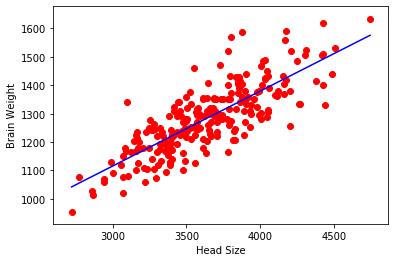

In [ ]:
## PLOTTING

import matplotlib.pyplot as plt
x = np.linspace(np.min(X), np.max(X))
y = c0 + c1 * x
plt.plot(x, y, color='b', label='Regression Line')
plt.scatter(X, Y, c='r', label='Scatter Plot')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

### **COMPARISION OF LINEAR REGRESSION USING SKLEARN AND LINEAR REGRESSION USING PYTHON:**

In both the cases we get the same R2 score, hence Simple Linear Regression works equally well for both the cases

